# Regresión lineal simple y regresión lineal múltiple

Regresión lineal es uno de los modelos más sencillos, pero es bastante común y muy útil. Pertenece a la familia de algoritmos supervisados. La finalidad es encontrar la relación entre una variable dependiente *Y* y una (o varias) independiente *X*.

Entonces tienes que encontrar la ecuación de la recta que mejor se ajuste a los datos, esto es, encontrando los coeficientes `b0` y `b1` en `y = b0 + b1x`. 

## Regresión múltiple vs simple

Imagina que tienes un dataset de los salarios de programadores y los años de experiencia. Entonces puedes desarrollar un modelo lineal que relacione los años de experiencia y el salario para, por ejemplo, predecir el salario de alguien dados *X* años en la industria. Aquí tenemos un **modelo lineal simple**.


![](https://www.researchgate.net/profile/Hieu-Tran-17/publication/333457161/figure/fig3/AS:763959762247682@1559153609649/Linear-Regression-model-sample-illustration.ppm)


No obstante, tenemos más variables como la edad, horas de estudio, etc. ¡También podemos ingresar esas variables en nuestro modelo, siempre y cuando sean cuantitativas! En este caso ya no estamos buscando la recta que mejor se ajuste, sino el plano de mejor ajuste. Aquí tenemos un **modelo lineal múltiple**.

![](https://github.com/XavierCarrera/Tutorial-Machine-Learning-Regresion-Lineal/raw/main/img/hiperplano.png?raw=true)

### ¿Y si hay demasiadas variables?

Si tienes demasiadas variables, solo algunas pocas de ellas son las más relevantes para ingresar al modelo. Entonces, para identificarlas y cuantificar su relevancia usamos un algoritmo de reducción de dimensionalidad. Uno de ellos es Principal Component Analysis (PCA).

La idea es mejorar el rendimiento del modelo a cambio de perder una información mínima (digamos entre un 3% y 10%). En otros apuntes estaré escribiendo sobre PCA.

# Regresión lineal simple con Scikit-Learn

## División de datos

A los datasets se los divide en la parte de entrenamiento y la parte de testing. Por lo general, la relación es 80%-20%. Para hacer esto usamos `train_test_split` de Scikit-Learn.

El dataset que usaremos está acá: https://static.platzi.com/media/public/uploads/salarios_32849f3e-7f53-4139-b334-b8de8beb144a.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
dataset = pd.read_csv('/work/datasets/salarios.csv')
dataset.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [ ]:
dataset.shape

(30, 2)

In [ ]:
#Escogemos nuestras variables x y para modelar
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
#Ahora procedemos a dividir nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Recuerda que `train_test_split` recoge los datos de forma random. Entonces, el argumento `random_state` sirve para indicar si se trabaja con los datos aleatorios iniciales siempre o se escoge nuevos.

* `random_state = 0` -> Escoge los mismos datos.
* `random_state = None` -> Itera y escoge nuevos datos cada vez.

Por lo general, trabaja con `random_state = 0`. Puedes ver más en este comentario: https://platzi.com/comentario/1736368/

## Creación del modelo

Una vez separados los datos de entrenamiento y testing vamos a crear el primer modelo de Machine Learning.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Esto crea el modelo

LinearRegression()

Grafiquemos los datos de entrenamiento.

In [ ]:
sns.set_theme()

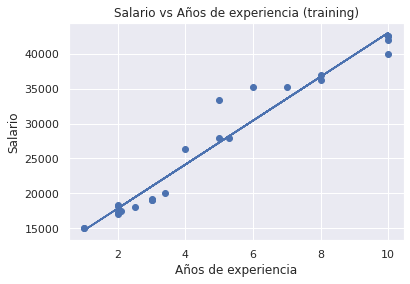

In [ ]:
fig, ax = plt.subplots()
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train)) #predict predice los valores
plt.title('Salario vs Años de experiencia (training)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

Ahora veamos como se ajusta la curva de predicción con los datos de testing. Mientras más cercanos mejor, aunque a esto lo podemos cuantificar también con `regressor.score(X_test, Y_test)`.

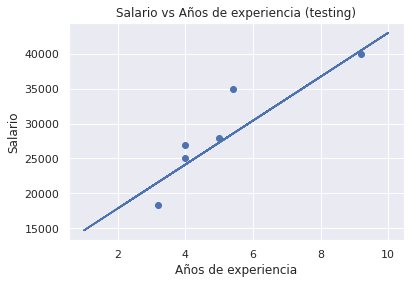

In [ ]:
fig, ax = plt.subplots()
plt.scatter(X_test, Y_test)
plt.plot(X_train, regressor.predict(X_train)) #predict predice los valores
plt.title('Salario vs Años de experiencia (testing)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

In [ ]:
regressor.score(X_test, Y_test)

0.7862437374732997

El coeficiente de correlación es de 0.79, mientras más cercano a 1, mejores predicciones tenemos. Podemos mejorar esto agregando una variable adicional cuantitativa. Por ahora, y a modo de ejemplo, me inventaré esta variable. En la vida real deberás usar datos reales.

In [ ]:
import random
from sklearn import preprocessing

In [ ]:
#Creamos una lista de países y la codificamos 
paises = ['CO','BR','PE','MX', 'EC', 'AR', 'UY']
le1 = preprocessing.LabelEncoder()
paises_encoded = le1.fit_transform(paises)

In [ ]:
paises_encoded

array([2, 1, 5, 4, 3, 0, 6])

In [ ]:
#Asignamos aleatoriamente un país a cada dato en el dataset
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]
dataset['pais'] = paises_dataset

La variable a predecir *Y* es el salario y las dos variables de entrada *X1*, *X2* son los años de experiencia y el país.

In [ ]:
xx = dataset[['Aexperiencia', 'pais']].values
yy = dataset['Salario'].values

In [ ]:
XX_train, XX_test, YY_train, YY_test = train_test_split(xx, yy, test_size=0.2, random_state=0)

In [ ]:
regressor.fit(XX_train, YY_train)

LinearRegression()

Text(0.5, 0, 'Salario')

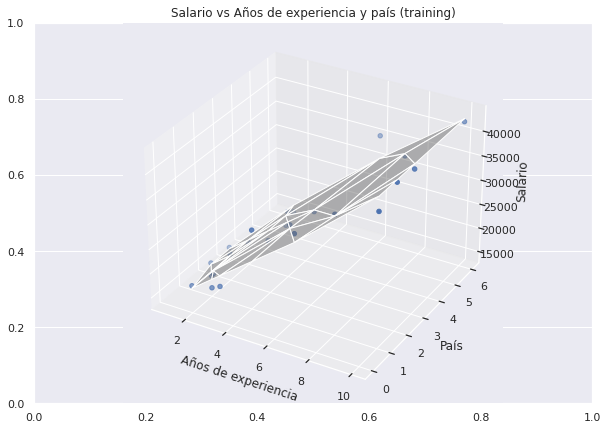

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(XX_train[:, 0], XX_train[:, 1], YY_train)
ax.plot_trisurf(XX_train[:, 0], 
                XX_train[:, 1], 
                regressor.predict(XX_train), 
                color='grey', 
                alpha=0.5)
plt.title('Salario vs Años de experiencia y país (training)')
ax.set_xlabel('Años de experiencia')
ax.set_ylabel('País')
ax.set_zlabel('Salario')

Text(0.5, 0, 'Salario')

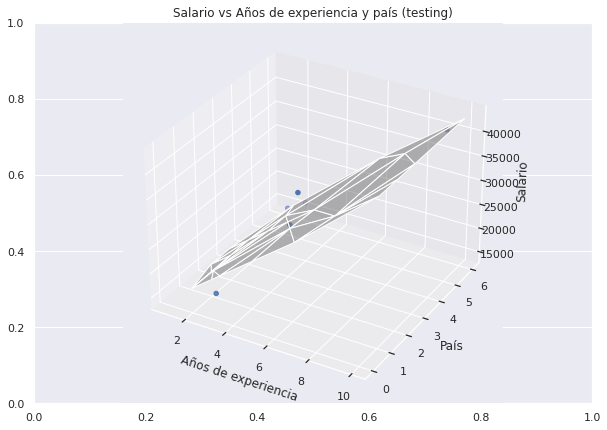

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(XX_test[:, 0], XX_test[:, 1], YY_test)
ax.plot_trisurf(XX_train[:, 0], 
                XX_train[:, 1], 
                regressor.predict(XX_train), 
                color='grey', alpha=0.5)
plt.title('Salario vs Años de experiencia y país (testing)')
ax.set_xlabel('Años de experiencia')
ax.set_ylabel('País')
ax.set_zlabel('Salario')

In [ ]:
regressor.score(XX_test, YY_test)

0.7875400289133272

En este caso el score se mantiene prácticamente igual. Sin embargo, esta es la manera de hacer una correlación múltiple. Además, recuerda que si tienes un montón de variables, puedes reducir las dimensiones con PCA para entrenar el modelo.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=041dfe44-1bec-412b-9d74-e111f757f0ed' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>